## Performance analysis for NHS Ambulance services

Explanation of the data:
Code and Name: are identifiers for the hospital
Attendance numbers:
Type 1 Departments - Major A&E: This is the area of the Emergency Department where the more serious patients go.
Type 2 Departments - Single Specialty: These are speciality Emergency departments for example a Paediatric department.
Type 3 Departments - Other A&E/Minor Injury Unit: Minor Injury Units are basically walk-in clinics for minor ailments, fractures, rashes etc. These have more available resources than a Doctor's surgery but operate similarly in an ambulant fashion.
Total attendances: The total of the above.
4 hours to decision:
This is the number of patients who left the Emergency Department within 4 hours of attending (4 Hours is an NHS target). This means they could be discharged, referred somewhere else or admitted to a ward.

Emergency Admission:
These are the number of people that were admitted to a ward from any of the Emergency Department types. Additionally, there is the column: 'Other Emergency admissions (i.e. not via A&E)' for patients who were admitted from somewhere else. This could be a doctor's surgery for example.

Long stays
Some patients stay in the emergency department for a long time for different reasons. These figures are given in: Number of patients spending >12 hours from decision to admit to admission'. Again this is a target monitored by the NHS.

In [41]:
# Load the relevant libraries and load the data

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import KNNImputer

In [51]:
df = pd.read_csv("AE_attendances_england_monthly.csv")

In [52]:
df.head(3)

,Unnamed: 0,date,Name,Type 1 Departments - Major A&E,Type 2 Departments - Single Specialty,Type 3 Departments - Other A&E/Minor Injury Unit,Total attendances,Type 1 Departments - 4 hours to decision,Type 2 Departments - 4 hours to decision,Type 3 Departments - 4 hours to decision,Percentage in 4 hours or less (all),Emergency Admissions via Type 1 A&E in 4 hours,Emergency Admissions via Type 2 A&E in 4 hours,Emergency Admissions via Type 3 and 4 A&E in 4 hours,Other Emergency admissions (i.e not via A&E),Number of patients spending >12 hours from decision to admit to admission,month,year,lat,lon
0,0,2010-11-01,Aintree University Hospitals NHS Foundation Trust,4622.0,0.0,0.0,4622.0,7.0,0.0,0.0,2.995435,1406.0,0.0,0.0,530.0,0.0,44.0,8040.0,53.461606,-2.943427
1,1,2010-11-01,Airedale NHS Trust,3965.0,0.0,0.0,3965.0,65.0,0.0,0.0,3.934107,892.0,0.0,0.0,568.0,0.0,44.0,8040.0,NaN,NaN
2,2,2010-11-01,Alder Hey Children’S NHS Foundation Trust,4541.0,0.0,0.0,4541.0,71.0,0.0,0.0,3.937936,1825.0,0.0,0.0,270.0,0.0,44.0,8040.0,50.183000,-5.416000


## Exploring the Data

In [53]:
# Use the shape function to get the dimension of the dataset

df.shape

(27112, 20)

In [54]:
# Use the describe function to get the statistics of the dataset

df.describe()

,Unnamed: 0,Type 1 Departments - Major A&E,Type 2 Departments - Single Specialty,Type 3 Departments - Other A&E/Minor Injury Unit,Total attendances,Type 1 Departments - 4 hours to decision,Type 2 Departments - 4 hours to decision,Type 3 Departments - 4 hours to decision,Percentage in 4 hours or less (all),Emergency Admissions via Type 1 A&E in 4 hours,Emergency Admissions via Type 2 A&E in 4 hours,Emergency Admissions via Type 3 and 4 A&E in 4 hours,Other Emergency admissions (i.e not via A&E),Number of patients spending >12 hours from decision to admit to admission,month,year,lat,lon
count,27112.000000,27112.000000,27112.000000,27112.000000,27112.000000,27112.000000,27112.000000,27112.000000,27112.000000,27112.000000,27112.000000,27112.000000,27112.000000,27112.000000,27112.000000,27112.000000,19102.000000,19102.000000
mean,13555.500000,4869.897499,195.986664,2443.076608,7508.960771,1740.345235,64.784228,957.586050,2.234394,1362.780134,6.543966,14.841030,492.760586,0.973407,14.809937,4938.091804,52.216046,-1.794117
std,7826.704585,5514.645104,713.439553,3085.216457,6683.428695,3389.849054,429.312711,2366.652543,1.665038,1577.655156,65.205515,111.320623,665.629857,8.816612,14.266937,3326.360831,1.482822,6.634475
min,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2010.000000,40.764096,-83.695900
25%,6777.750000,0.000000,0.000000,0.000000,2458.000000,0.000000,0.000000,0.000000,0.910265,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2017.000000,51.416667,-2.166667
50%,13555.500000,4197.000000,0.000000,1464.000000,5966.500000,173.000000,0.000000,0.000000,1.000000,1065.500000,0.000000,0.000000,217.000000,0.000000,9.000000,2020.000000,52.128857,-1.266667
75%,20333.250000,8379.750000,0.000000,3646.000000,10783.250000,1357.000000,0.000000,309.000000,3.941170,2359.000000,0.000000,0.000000,789.000000,0.000000,20.000000,8052.000000,53.208611,-0.281600
max,27111.000000,62312.000000,17570.000000,36710.000000,85576.000000,41194.000000,16308.000000,35992.000000,5.000000,21628.000000,4424.000000,3032.000000,7476.000000,417.000000,60.000000,10075.000000,55.181000,1.723500


In [55]:
# Check for null values and Nan Values

df.isnull().sum()

Unnamed: 0                                                                      0
date                                                                            0
Name                                                                            4
Type 1 Departments - Major A&E                                                  0
Type 2 Departments - Single Specialty                                           0
Type 3 Departments - Other A&E/Minor Injury Unit                                0
Total attendances                                                               0
Type 1 Departments - 4 hours to decision                                        0
Type 2 Departments - 4 hours to decision                                        0
Type 3 Departments - 4 hours to decision                                        0
Percentage in 4 hours or less (all)                                             0
Emergency Admissions via Type 1 A&E in 4 hours                                  0
Emergency Admiss

## Data Cleaning

In [60]:
# Convert the 'date' column to datetime format

df['date'] = pd.to_datetime(df['date'])

In [61]:
df.dtypes

date                                              datetime64[ns]
name                                                      object
type_1_departments_major_a&e                             float64
type_2_departments_single_specialty                      float64
type_3_departments_other_a&e_minor_injury_unit           float64
total_attendances                                        float64
type_1_4_hours_decision                                  float64
type_2_4_hours_decision                                  float64
type_3_4_hours_decision                                  float64
pct_in_4_hours_or_less                                   float64
emergency_adm_type_1_a&e                                 float64
emergency_adm_type_2_a&e                                 float64
emergency_adm_type_3_a&e                                 float64
other_emergency_adm                                      float64
patients_12hr_decision_admission                         float64
month                    

In [63]:
#Rename the columns for readability

df.rename(columns={
    "date": "date",
    "Name": "name",
    "Type 1 Departments - Major A&E": "type_1_departments_major_a&e",
    "Type 2 Departments - Single Specialty": "type_2_departments_single_specialty",
    "Type 3 Departments - Other A&E/Minor Injury Unit": "type_3_departments_other_a&e_minor_injury_unit",
    "Total attendances": "total_attendances",
    "Type 1 Departments - 4 hours to decision": "type_1_4_hours_decision",
    "Type 2 Departments - 4 hours to decision": "type_2_4_hours_decision",
    "Type 3 Departments - 4 hours to decision": "type_3_4_hours_decision",
    "Percentage in 4 hours or less (all)": "pct_in_4_hours_or_less",
    "Emergency Admissions via Type 1 A&E in 4 hours": "emergency_adm_type_1_a&e",
    "Emergency Admissions via Type 2 A&E in 4 hours": "emergency_adm_type_2_a&e",
    "Emergency Admissions via Type 3 and 4 A&E in 4 hours": "emergency_adm_type_3_a&e",
    "Other Emergency admissions (i.e not via A&E)": "other_emergency_adm",
    "Number of patients spending >12 hours from decision to admit to admission": "patients_12hr_decision_admission",
    "month": "month",
    "year": "year",
    "lat": "lat",
    "lon": "lon"
}, inplace=True)

df.head(3)

,date,name,type_1_departments_major_a&e,type_2_departments_single_specialty,type_3_departments_other_a&e_minor_injury_unit,total_attendances,type_1_4_hours_decision,type_2_4_hours_decision,type_3_4_hours_decision,pct_in_4_hours_or_less,emergency_adm_type_1_a&e,emergency_adm_type_2_a&e,emergency_adm_type_3_a&e,other_emergency_adm,patients_12hr_decision_admission,month,year,lat,lon
0,2010-11-01,Aintree University Hospitals NHS Foundation Trust,4622.0,0.0,0.0,4622.0,7.0,0.0,0.0,2.995435,1406.0,0.0,0.0,530.0,0.0,44.0,8040.0,53.461606,-2.943427
1,2010-11-01,Airedale NHS Trust,3965.0,0.0,0.0,3965.0,65.0,0.0,0.0,3.934107,892.0,0.0,0.0,568.0,0.0,44.0,8040.0,NaN,NaN
2,2010-11-01,Alder Hey Children’S NHS Foundation Trust,4541.0,0.0,0.0,4541.0,71.0,0.0,0.0,3.937936,1825.0,0.0,0.0,270.0,0.0,44.0,8040.0,50.183000,-5.416000


In [64]:
df.isna().sum()

date                                                 0
name                                                 4
type_1_departments_major_a&e                         0
type_2_departments_single_specialty                  0
type_3_departments_other_a&e_minor_injury_unit       0
total_attendances                                    0
type_1_4_hours_decision                              0
type_2_4_hours_decision                              0
type_3_4_hours_decision                              0
pct_in_4_hours_or_less                               0
emergency_adm_type_1_a&e                             0
emergency_adm_type_2_a&e                             0
emergency_adm_type_3_a&e                             0
other_emergency_adm                                  0
patients_12hr_decision_admission                     0
month                                                0
year                                                 0
lat                                               8010
lon       

In [65]:
# Fix missing values using KNN

In [66]:
# Check for missing values in 'lat' and 'lon' before imputation
print("Missing values before imputation:")
print(df[['lat', 'lon']].isnull().sum())

Missing values before imputation:
lat    8010
lon    8010
dtype: int64


In [67]:
# Apply KNN Imputation for missing latitude and longitude

geo_data = df[['lat', 'lon']]
imputer = KNNImputer(n_neighbors=5)  # Adjust the number of neighbors as needed
geo_data_imputed = imputer.fit_transform(geo_data)

In [68]:
# Update the dataset with imputed values

df['lat'], df['lon'] = geo_data_imputed[:, 0], geo_data_imputed[:, 1]

In [69]:
# Check for missing values after imputation

print("Missing values after imputation:")
print(df[['lat', 'lon']].isnull().sum())

Missing values after imputation:
lat    0
lon    0
dtype: int64


In [79]:
df.shape

(27108, 19)

In [71]:
#Drop Nan Values

df = df.dropna()
df.head(2)

,date,name,type_1_departments_major_a&e,type_2_departments_single_specialty,type_3_departments_other_a&e_minor_injury_unit,total_attendances,type_1_4_hours_decision,type_2_4_hours_decision,type_3_4_hours_decision,pct_in_4_hours_or_less,emergency_adm_type_1_a&e,emergency_adm_type_2_a&e,emergency_adm_type_3_a&e,other_emergency_adm,patients_12hr_decision_admission,month,year,lat,lon
0,2010-11-01,Aintree University Hospitals NHS Foundation Trust,4622.0,0.0,0.0,4622.0,7.0,0.0,0.0,2.995435,1406.0,0.0,0.0,530.0,0.0,44.0,8040.0,53.461606,-2.943427
1,2010-11-01,Airedale NHS Trust,3965.0,0.0,0.0,3965.0,65.0,0.0,0.0,3.934107,892.0,0.0,0.0,568.0,0.0,44.0,8040.0,52.216046,-1.794117


In [72]:
df.shape

(27108, 19)

In [73]:
#Save the cleaned data

df.to_csv ('cleaned_AE_attendances_england_monthly.csv')

### Load new Data

In [42]:
#Load the clean Dataset

nhs_data = pd.read_csv('cleaned_AE_attendances_england_monthly.csv')

In [43]:
nhs_data.head(2)

,Unnamed: 0,date,name,type_1_departments_major_a&e,type_2_departments_single_specialty,type_3_departments_other_a&e_minor_injury_unit,total_attendances,type_1_4_hours_decision,type_2_4_hours_decision,type_3_4_hours_decision,pct_in_4_hours_or_less,emergency_adm_type_1_a&e,emergency_adm_type_2_a&e,emergency_adm_type_3_a&e,other_emergency_adm,patients_12hr_decision_admission,month,year,lat,lon
0,0,2010-11-01,Aintree University Hospitals NHS Foundation Trust,4622.0,0.0,0.0,4622.0,7.0,0.0,0.0,2.995435,1406.0,0.0,0.0,530.0,0.0,44.0,8040.0,53.461606,-2.943427
1,1,2010-11-01,Airedale NHS Trust,3965.0,0.0,0.0,3965.0,65.0,0.0,0.0,3.934107,892.0,0.0,0.0,568.0,0.0,44.0,8040.0,52.216046,-1.794117


In [44]:
#Drop the unnamed table

nhs_data.drop (['Unnamed: 0', 'month', 'year', 'lat','lon'], axis=1, inplace=True)

In [45]:
nhs_data.head(2)

,date,name,type_1_departments_major_a&e,type_2_departments_single_specialty,type_3_departments_other_a&e_minor_injury_unit,total_attendances,type_1_4_hours_decision,type_2_4_hours_decision,type_3_4_hours_decision,pct_in_4_hours_or_less,emergency_adm_type_1_a&e,emergency_adm_type_2_a&e,emergency_adm_type_3_a&e,other_emergency_adm,patients_12hr_decision_admission
0,2010-11-01,Aintree University Hospitals NHS Foundation Trust,4622.0,0.0,0.0,4622.0,7.0,0.0,0.0,2.995435,1406.0,0.0,0.0,530.0,0.0
1,2010-11-01,Airedale NHS Trust,3965.0,0.0,0.0,3965.0,65.0,0.0,0.0,3.934107,892.0,0.0,0.0,568.0,0.0


In [46]:
nhs_data.shape

(27108, 15)

In [47]:
#Convert Date to Datetime
nhs_data['date'] = pd.to_datetime(nhs_data['date'])

In [48]:
nhs_data.dtypes

date                                              datetime64[ns]
name                                                      object
type_1_departments_major_a&e                             float64
type_2_departments_single_specialty                      float64
type_3_departments_other_a&e_minor_injury_unit           float64
total_attendances                                        float64
type_1_4_hours_decision                                  float64
type_2_4_hours_decision                                  float64
type_3_4_hours_decision                                  float64
pct_in_4_hours_or_less                                   float64
emergency_adm_type_1_a&e                                 float64
emergency_adm_type_2_a&e                                 float64
emergency_adm_type_3_a&e                                 float64
other_emergency_adm                                      float64
patients_12hr_decision_admission                         float64
dtype: object

In [49]:
# Ectract the Month into a new column

nhs_data['year'] = nhs_data['date'].dt.year
nhs_data['month'] = nhs_data['date'].dt.month

In [50]:
nhs_data.head(5)

,date,name,type_1_departments_major_a&e,type_2_departments_single_specialty,type_3_departments_other_a&e_minor_injury_unit,total_attendances,type_1_4_hours_decision,type_2_4_hours_decision,type_3_4_hours_decision,pct_in_4_hours_or_less,emergency_adm_type_1_a&e,emergency_adm_type_2_a&e,emergency_adm_type_3_a&e,other_emergency_adm,patients_12hr_decision_admission,year,month
0,2010-11-01,Aintree University Hospitals NHS Foundation Trust,4622.0,0.0,0.0,4622.0,7.0,0.0,0.0,2.995435,1406.0,0.0,0.0,530.0,0.0,2010,11
1,2010-11-01,Airedale NHS Trust,3965.0,0.0,0.0,3965.0,65.0,0.0,0.0,3.934107,892.0,0.0,0.0,568.0,0.0,2010,11
2,2010-11-01,Alder Hey Children’S NHS Foundation Trust,4541.0,0.0,0.0,4541.0,71.0,0.0,0.0,3.937936,1825.0,0.0,0.0,270.0,0.0,2010,11
3,2010-11-01,Ashford And St Peter'S Hospitals NHS Trust,7010.0,0.0,769.0,7779.0,392.0,0.0,0.0,3.797332,1902.0,0.0,0.0,163.0,0.0,2010,11
4,2010-11-01,"Ashton, Leigh And Wigan Primary Care Trust",0.0,0.0,4297.0,4297.0,0.0,0.0,0.0,4.000000,0.0,0.0,0.0,0.0,0.0,2010,11


## Exploratory Data Analysis (EDA)

### Distribution Analysis

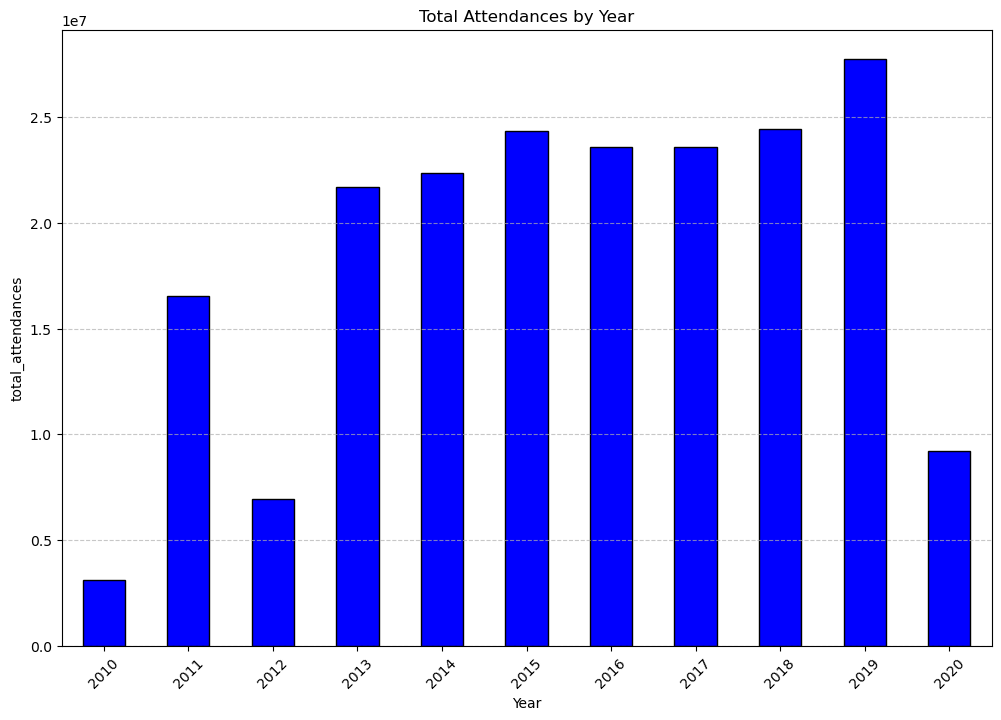

In [51]:
# Group by Year and sum the total attendances

plt.figure(figsize=(12, 8)) 
attendance_by_year = nhs_data.groupby('year')['total_attendances'].sum()

# Create the histogram
attendance_by_year.plot(kind='bar', color='blue', edgecolor='black')
plt.title('Total Attendances by Year')
plt.xlabel('Year')
plt.ylabel('total_attendances')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

As seen above in the diagram, 2019 has the most attendance to the hospital

<Figure size 1600x1000 with 0 Axes>

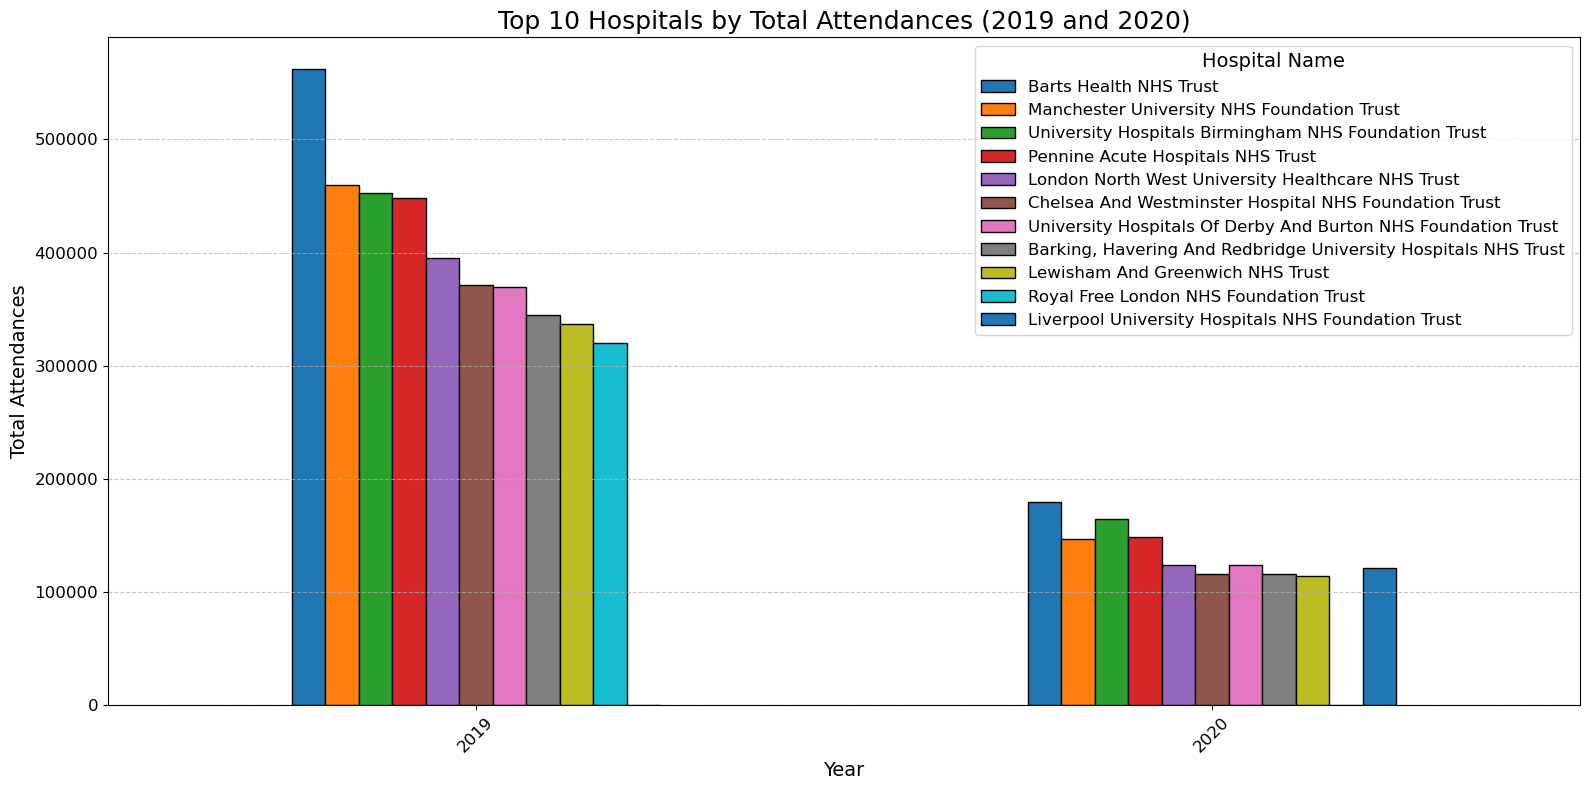

In [67]:


# Filter the data for years 2019 and 2020
filtered_years = nhs_data[nhs_data['year'].isin([2019, 2020])]

# Group by year and hospital, summing total attendances
attendance_by_year_and_hospital = (
    filtered_years.groupby(['year', 'name'])['total_attendances'].sum()
)

# Select the top 10 hospitals for each year
top_10_per_year = (
    attendance_by_year_and_hospital.groupby('year', group_keys=False)
    .apply(lambda x: x.nlargest(10))
)

# Unstack the data for plotting
top_10_unstacked = top_10_per_year.unstack()

# Plot the grouped bar chart
plt.figure(figsize=(16, 10))
top_10_unstacked.plot(kind='bar', stacked=False, figsize=(16, 8), edgecolor='black')

# Set the title and axis labels
plt.title('Top 10 Hospitals by Total Attendances (2019 and 2020)', fontsize=18)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Total Attendances', fontsize=14)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)

# Add legend for hospital names
plt.legend(title="Hospital Name", fontsize=12, title_fontsize=14)

# Add a grid for the y-axis
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()


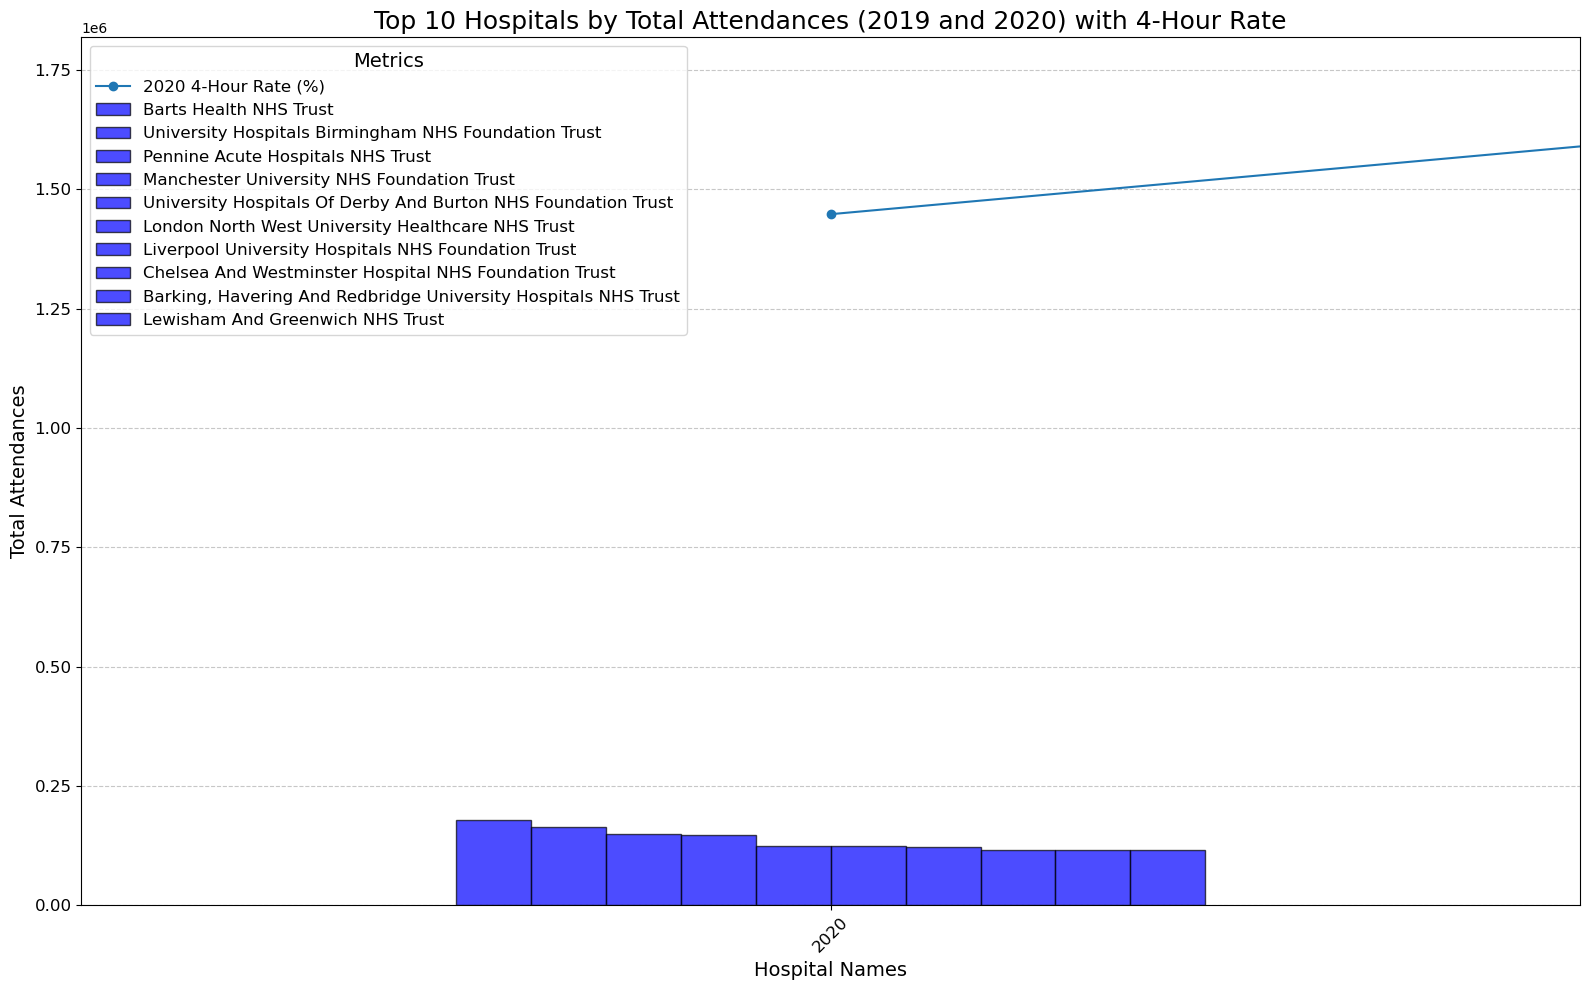

In [72]:
import matplotlib.pyplot as plt
import pandas as pd

# Filter the data for years 2019 and 2020
filtered_years = nhs_data[nhs_data['year'].isin([2020])]

# Group by year and hospital, summing total attendances and calculating another metric
attendance_metrics = filtered_years.groupby(['year', 'name']).agg(
    total_attendances=('total_attendances', 'sum'),
    four_hour_rate=('type_1_4_hours_decision', lambda x: (x.sum() / x.count()) * 100)  # Example metric: 4-hour decision rate
)

# Select the top 10 hospitals for each year based on total attendances
top_10_per_year = attendance_metrics.groupby('year', group_keys=False).apply(
    lambda x: x.nlargest(10, 'total_attendances')
)

# Unstack the data for plotting
attendance_unstacked = top_10_per_year['total_attendances'].unstack()
four_hour_unstacked = top_10_per_year['four_hour_rate'].unstack()

# Plot the grouped bar chart with the additional column
fig, ax1 = plt.subplots(figsize=(16, 10))

attendance_unstacked.plot(kind='bar', stacked=False, ax=ax1, edgecolor='black', alpha=0.7, color='blue', label='Total Attendances')

# Plot the additional metric as a line on the same chart
for year in [ 2020]:
    ax1.plot(
        range(len(attendance_unstacked.loc[year])),
        four_hour_unstacked.loc[year],
        marker='o',
        label=f'{year} 4-Hour Rate (%)'
    )

# Set titles and labels
plt.title('Top 10 Hospitals by Total Attendances (2019 and 2020) with 4-Hour Rate', fontsize=18)
plt.xlabel('Hospital Names', fontsize=14)
plt.ylabel('Total Attendances', fontsize=14)
ax1.set_xticks(range(len(attendance_unstacked.index)))
ax1.set_xticklabels(attendance_unstacked.index, rotation=45, fontsize=12)
plt.yticks(fontsize=12)

# Add a legend
plt.legend(title="Metrics", fontsize=12, title_fontsize=14)

# Add a grid
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()
